In [135]:
import numpy as np
import pandas as pd 
import fbprophet 
from fbprophet import Prophet
import plotly
import statsmodels
from statsmodels.tsa.stattools import acf
from matplotlib import pyplot
import altair as alt
import scipy
from scipy import signal
import spectrum 
from spectrum import WelchPeriodogram
from spectrum import Periodogram
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import q_stat
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.stattools import arma_order_select_ic
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from math import sqrt
import warnings
from statsmodels.tsa.stattools import kpss
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [136]:
flu_data = pd.read_csv('flu.csv', header = 2, sep = ',')

In [137]:
flu_data.head(10)

,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,...,AH5,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2,TITLE
0,United States of America,Region of the Americas of WHO,North America,2013,1,2012-12-31,2013-01-06,18219,18219,0.0,...,0.0,1653,5377,0,0,1097,1097,6474,NaN,Widespread Outbreak
1,United States of America,Region of the Americas of WHO,North America,2013,2,2013-01-07,2013-01-13,20013,20013,0.0,...,0.0,1767,5752,0,0,1145,1145,6897,NaN,Widespread Outbreak
2,United States of America,Region of the Americas of WHO,North America,2013,3,2013-01-14,2013-01-20,19228,19228,0.0,...,0.0,1624,4858,0,0,1078,1078,5936,NaN,Widespread Outbreak
3,United States of America,Region of the Americas of WHO,North America,2013,4,2013-01-21,2013-01-27,17139,17139,0.0,...,0.0,1528,4039,0,0,1091,1091,5130,NaN,Widespread Outbreak
4,United States of America,Region of the Americas of WHO,North America,2013,5,2013-01-28,2013-02-03,14795,14795,0.0,...,0.0,951,2963,0,0,1076,1076,4039,NaN,Widespread Outbreak
5,United States of America,Region of the Americas of WHO,North America,2013,6,2013-02-04,2013-02-10,13259,13259,0.0,...,0.0,706,2008,0,0,1051,1051,3059,NaN,Widespread Outbreak
6,United States of America,Region of the Americas of WHO,North America,2013,7,2013-02-11,2013-02-17,11468,11468,0.0,...,0.0,486,1353,0,0,1032,1032,2385,NaN,Widespread Outbreak
7,United States of America,Region of the Americas of WHO,North America,2013,8,2013-02-18,2013-02-24,10398,10398,0.0,...,0.0,363,985,0,0,1084,1084,2069,NaN,Widespread Outbreak
8,United States of America,Region of the Americas of WHO,North America,2013,9,2013-02-25,2013-03-03,9499,9499,0.0,...,0.0,289,730,0,0,1046,1046,1776,NaN,Widespread Outbreak
9,United States of America,Region of the Americas of WHO,North America,2013,10,2013-03-04,2013-03-10,8999,8999,0.0,...,0.0,200,562,0,0,1083,1083,1645,NaN,Regional Outbreak


In [138]:
#Percentage of positive results
flu_data["pct_positive"]=round((flu_data["ALL_INF"]/flu_data["SPEC_PROCESSED_NB"])*100,2)

In [139]:
flu_data.head(10)

,Country,WHOREGION,FLUREGION,Year,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,AH1,...,ANOTSUBTYPED,INF_A,BYAMAGATA,BVICTORIA,BNOTDETERMINED,INF_B,ALL_INF,ALL_INF2,TITLE,pct_positive
0,United States of America,Region of the Americas of WHO,North America,2013,1,2012-12-31,2013-01-06,18219,18219,0.0,...,1653,5377,0,0,1097,1097,6474,NaN,Widespread Outbreak,35.53
1,United States of America,Region of the Americas of WHO,North America,2013,2,2013-01-07,2013-01-13,20013,20013,0.0,...,1767,5752,0,0,1145,1145,6897,NaN,Widespread Outbreak,34.46
2,United States of America,Region of the Americas of WHO,North America,2013,3,2013-01-14,2013-01-20,19228,19228,0.0,...,1624,4858,0,0,1078,1078,5936,NaN,Widespread Outbreak,30.87
3,United States of America,Region of the Americas of WHO,North America,2013,4,2013-01-21,2013-01-27,17139,17139,0.0,...,1528,4039,0,0,1091,1091,5130,NaN,Widespread Outbreak,29.93
4,United States of America,Region of the Americas of WHO,North America,2013,5,2013-01-28,2013-02-03,14795,14795,0.0,...,951,2963,0,0,1076,1076,4039,NaN,Widespread Outbreak,27.30
5,United States of America,Region of the Americas of WHO,North America,2013,6,2013-02-04,2013-02-10,13259,13259,0.0,...,706,2008,0,0,1051,1051,3059,NaN,Widespread Outbreak,23.07
6,United States of America,Region of the Americas of WHO,North America,2013,7,2013-02-11,2013-02-17,11468,11468,0.0,...,486,1353,0,0,1032,1032,2385,NaN,Widespread Outbreak,20.80
7,United States of America,Region of the Americas of WHO,North America,2013,8,2013-02-18,2013-02-24,10398,10398,0.0,...,363,985,0,0,1084,1084,2069,NaN,Widespread Outbreak,19.90
8,United States of America,Region of the Americas of WHO,North America,2013,9,2013-02-25,2013-03-03,9499,9499,0.0,...,289,730,0,0,1046,1046,1776,NaN,Widespread Outbreak,18.70
9,United States of America,Region of the Americas of WHO,North America,2013,10,2013-03-04,2013-03-10,8999,8999,0.0,...,200,562,0,0,1083,1083,1645,NaN,Regional Outbreak,18.28


## Utility Functions

In [140]:
def arima_window_ase(data_series, train_ratio = .60, order = (0,0,0)): 
    X_series = data_series.values
    size = int(len(X_series)*train_ratio)
    train,test = X_series[0:size], X_series[size:len(X_series)]
    history = [i for i in train]
    preds = list()
    for t in range(len(test)): 
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        fore_cast = model_fit.forecast()
        yhat = fore_cast[0]
        preds.append(yhat)
        obs = test[t]
        history.append(obs)
    rmse = sqrt(mean_squared_error(test, preds))
    pyplot.plot(test)
    pyplot.plot(preds, color='red')
    pyplot.show()
    
    return rmse
    print(residuals.describe())

In [141]:

def arima_seas_window_ase(data_series, train_ratio = .60, order = (0,0,0), seasonal_order = (0,0,0,0),simple_differencing=True): 
    X_series = data_series.values
    size = int(len(X_series)*train_ratio)
    train,test = X_series[0:size], X_series[size:len(X_series)]
    history = [i for i in train]
    preds = list()
    for t in range(len(test)): 
        model = ARIMA(history, order=order)
        model = sm.tsa.statespace.SARIMAX(history, order=order, seasonal_order=seasonal_order,simple_differencing=simple_differencing) 
        model_fit = model.fit()
        fore_cast = model_fit.forecast()
        yhat = fore_cast[0]
        preds.append(yhat)
        obs = test[t]
        history.append(obs)
    rmse = sqrt(mean_squared_error(test, preds))
    pyplot.plot(test)
    pyplot.plot(preds, color='red')
    pyplot.show()
    
    return rmse
    print(residuals.describe())

In [142]:

def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [143]:
def make_realization(data_frame,x,y): 
    
    vis = alt.Chart(data_frame).mark_line().encode(
    x = x, 
    y = y
    )
    
    return vis

In [144]:
def make_autocorr(data_series, nlags=40, fft = False): 
    auto_corr = statsmodels.tsa.stattools.acf(data_series, nlags=nlags, fft=fft)
    data = pd.DataFrame(list(enumerate(auto_corr)), columns = ['Lag', 'AutoCor'])
    vis = alt.Chart(data).mark_bar().encode(
    x='Lag',
    y='AutoCor',
    )
    return vis

In [145]:
def make_sig_periodgram(data_series, fs = 1, scaling = 'density'): 
    f, Pxx_den = scipy.signal.periodogram(data_series, fs = fs, scaling=scaling)
    data = pd.DataFrame({'Freq' : f,'Density' : Pxx_den})
    vis = alt.Chart(data).mark_bar().encode(
        x='Freq',
        y='Density',
    )
    return vis

In [146]:
def make_welch_sig_periodgram(data_series, fs = 1, nperseg=50): 
    f, Pxx_den = scipy.signal.welch(flu_data.SPEC_RECEIVED_NB, fs = 1, nperseg=nperseg)
    data = pd.DataFrame({'Freq' : f,'Density' : Pxx_den})
    vis = alt.Chart(data).mark_bar().encode(
        x='Freq',
        y='Density',
    )
    return vis

In [147]:
def make_welch_periodgram(data_series, sampling = 50):
    psd = WelchPeriodogram(data_series, sampling)
    return psd[1]

In [148]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

# Charts based on pct_positive
> pct_positive = (flu_data["ALL_INF"]/flu_data["SPEC_PROCESSED_NB"])*100

In [149]:
#Based on pct_positive
make_realization(flu_data, 'EDATE:T', 'pct_positive')


alt.Chart(...)

In [150]:
#pct_positive
alt.Chart(flu_data).mark_line().encode(
    x='EDATE:T',
    y='pct_positive'
)

alt.Chart(...)

In [151]:
#pct_positive
make_autocorr(flu_data.pct_positive, nlags = 400)

alt.Chart(...)

In [152]:
#pct_positive
make_sig_periodgram(flu_data.pct_positive)

alt.Chart(...)

In [153]:
f2, Pxx_den2 = scipy.signal.periodogram(flu_data.pct_positive, fs = 1, scaling='density')

In [154]:
data = pd.DataFrame({'Freq' : f2,'Density' : Pxx_den2})
alt.Chart(data).mark_bar().encode(
    x='Freq',
    y='Density',
)

alt.Chart(...)

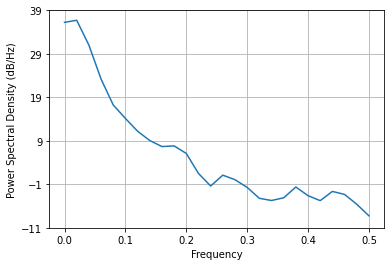

In [155]:
make_welch_periodgram(flu_data.pct_positive,sampling = 50)

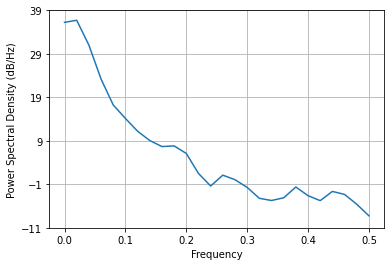

In [156]:
psd = WelchPeriodogram(flu_data.pct_positive,50)

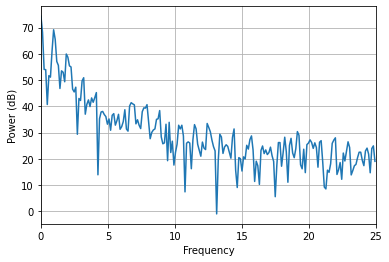

In [157]:
psd = Periodogram(flu_data.pct_positive, 50, scale_by_freq = True)
psd.plot()

In [158]:
dif_40 = statsmodels.tsa.statespace.tools.diff(flu_data.pct_positive,k_diff=0, k_seasonal_diff=40, seasonal_periods=1 )
dif_40

40     4.937752e+10
41    -1.039549e+10
42    -2.292025e+10
43     4.546358e+10
44    -5.629404e+10
           ...     
418    7.920024e+09
419   -1.239941e+10
420    1.586938e+10
421   -1.791559e+10
422    1.824039e+10
Name: pct_positive, Length: 383, dtype: float64

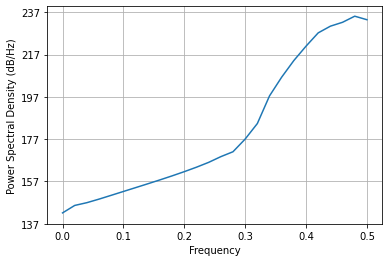

In [159]:

make_welch_periodgram(dif_40.values,sampling = 50)

In [160]:
#Auto Correlation Plot
make_autocorr(dif_40.values, nlags = 40)

alt.Chart(...)


# Tests and model start here

In [161]:
series = pd.Series(flu_data.pct_positive.values, index = flu_data.EDATE.astype('datetime64[ns]'), name = "Seasonal_Series")
series.describe()

count    423.000000
mean       9.364681
std        9.520811
min        0.050000
25%        2.325000
50%        4.440000
75%       15.035000
max       35.530000
Name: Seasonal_Series, dtype: float64

In [162]:
series = pd.Series(flu_data.pct_positive.values, index = flu_data.EDATE.astype('datetime64[ns]'), name = "Seasonal_Series")
series.describe()

count    423.000000
mean       9.364681
std        9.520811
min        0.050000
25%        2.325000
50%        4.440000
75%       15.035000
max       35.530000
Name: Seasonal_Series, dtype: float64

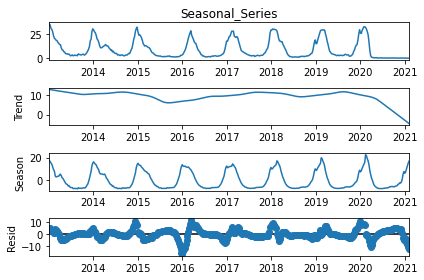

In [163]:
stl = STL(series, seasonal=41)
res = stl.fit()
fig = res.plot()

In [164]:
#Auto Correlation Plot
make_autocorr(flu_data.pct_positive.values, nlags = 500)

alt.Chart(...)

In [165]:
#Dickey-Fuller Test

adf_test(flu_data.pct_positive)

Results of Dickey-Fuller Test:
Test Statistic                -5.915518e+00
p-value                        2.578419e-07
#Lags Used                     5.000000e+00
Number of Observations Used    4.170000e+02
Critical Value (1%)           -3.446129e+00
Critical Value (5%)           -2.868496e+00
Critical Value (10%)          -2.570475e+00
dtype: float64


Dickey-Fuller Test
#### Caution: tends to reject more often than not, creating a Type 1 error. Incorrectly rejecting H0.

H0: The series has a unit root.

Ha: The series has no unit root

Results: Reject H0 -- Series has no unit root

In [166]:
#KPSS Test
kpss_test(flu_data.pct_positive.values)

Results of KPSS Test:
Test Statistic            0.109822
p-value                   0.100000
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\tsa\stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning



KPSS test

H0: The process is trend stationary.
Ha: The series has a unit root (series is not stationary).

Results:  Fail to reject H0 (p > 0.05) -- Trend is stationary

In [167]:
#Order determination assuming seasonality
res = statsmodels.tsa.stattools.arma_order_select_ic(flu_data.pct_positive.values, ic=["aic", "bic"], trend="nc")

C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\seans\Anaconda3\envs\qtw\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.

In [168]:
res.aic

,0,1,2
0,NaN,2849.506631,2436.656379
1,1738.738287,1563.309785,1513.459768
2,1473.484954,1473.566972,1473.501647
3,1473.928587,1473.839993,1476.148740
4,1474.345893,1475.181141,1477.455338


In [169]:
res.aic_min_order

(2, 0)

In [170]:
res.bic

,0,1,2
0,NaN,2857.601375,2448.798495
1,1746.833031,1575.451901,1529.649257
2,1485.627071,1489.756460,1493.738508
3,1490.118076,1494.076854,1500.432973
4,1494.582754,1499.465374,1505.786943


In [171]:
res.bic_min_order

(2, 0)

In [172]:
#https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html?highlight=arima#statsmodels.tsa.arima.model.ARIMA
#https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
#Original was 5,1,0

model = ARIMA(flu_data.pct_positive.values, order=(2,0,0))
model_fit = model.fit()

In [173]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  423
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -728.259
Date:                Sun, 21 Feb 2021   AIC                           1464.519
Time:                        21:44:22   BIC                           1480.708
Sample:                             0   HQIC                          1470.916
                                - 423                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7563      3.148      3.099      0.002       3.587      15.926
ar.L1          1.6665      0.024     70.871      0.000       1.620       1.713
ar.L2         -0.6971      0.023    -30.028      0.000      -0.743      -0.652
sigma2         1.8120      0.070     25.786      0.000       1.674       1.950
===================================================================================
Ljung-Box (L1) (Q):                   2.38   Jarque-Bera (JB):               506.94
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                             0.08
Prob(H) (two-sided):                  0.51   Kurtosis:                         8.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

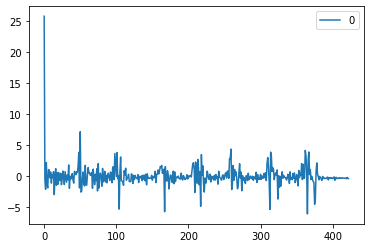

In [174]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

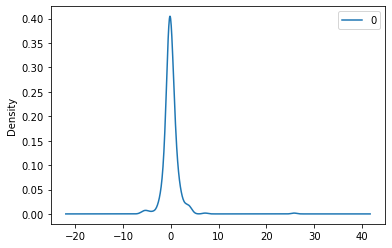

In [175]:
residuals.plot(kind='kde')
pyplot.show()

In [176]:
residuals.describe()

,0
count,423.000000
mean,0.023325
std,1.833395
min,-6.055178
25%,-0.536243
50%,-0.181773
75%,0.505245
max,25.773740


In [177]:
for i in range(24,51):
    print(sm.stats.acorr_ljungbox(model_fit.resid, lags=[i], return_df=True))

      lb_stat  lb_pvalue
24  14.886425   0.924038
      lb_stat  lb_pvalue
25  14.887009   0.943984
    lb_stat  lb_pvalue
26  15.7715   0.941545
      lb_stat  lb_pvalue
27  15.843702   0.955861
      lb_stat  lb_pvalue
28  16.156421   0.963446
      lb_stat  lb_pvalue
29  16.195435   0.973254
      lb_stat  lb_pvalue
30  16.329306    0.97978
      lb_stat  lb_pvalue
31  17.031167   0.980103
      lb_stat  lb_pvalue
32  17.051793   0.985811
      lb_stat  lb_pvalue
33  18.219098   0.982581
      lb_stat  lb_pvalue
34  18.553068   0.985531
     lb_stat  lb_pvalue
35  19.80801   0.981791
      lb_stat  lb_pvalue
36  20.017464   0.985611
      lb_stat  lb_pvalue
37  20.141447   0.989115
     lb_stat  lb_pvalue
38  20.30298   0.991672
      lb_stat  lb_pvalue
39  21.706366   0.988662
      lb_stat  lb_pvalue
40  23.426355   0.982975
      lb_stat  lb_pvalue
41  23.482557   0.987208
      lb_stat  lb_pvalue
42  23.519128    0.99055
      lb_stat  lb_pvalue
43  23.758105   0.992423
      lb

#### No serial correlation

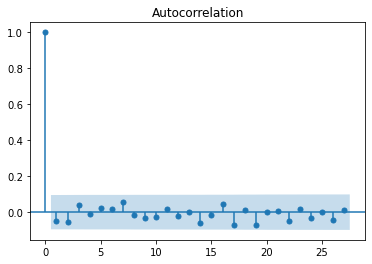

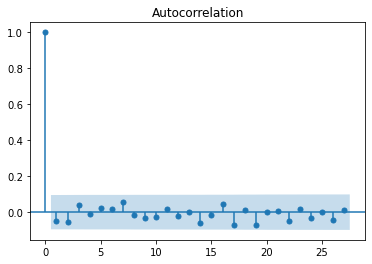

In [178]:
sm.graphics.tsa.plot_acf(residuals.values)

In [179]:
#Prediction
X = flu_data.pct_positive.values
size = int(len(X) * 0.60)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [180]:
for t in range(len(test)):
    model = ARIMA(history, order=(2,0,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=5.875228, expected=5.640000
predicted=6.243627, expected=7.090000
predicted=8.140095, expected=9.030000
predicted=10.351253, expected=10.080000
predicted=10.786306, expected=13.670000
predicted=15.958258, expected=18.880000
predicted=22.160855, expected=26.620000
predicted=31.612166, expected=29.360000
predicted=30.711255, expected=29.350000
predicted=28.806449, expected=30.500000
predicted=30.745234, expected=30.020000
predicted=29.163295, expected=30.170000
predicted=29.757608, expected=29.730000
predicted=28.932703, expected=29.540000
predicted=28.929695, expected=28.460000
predicted=27.271710, expected=25.130000
predicted=22.470163, expected=20.740000
predicted=17.436609, expected=17.980000
predicted=15.891803, expected=17.820000
predicted=17.524359, expected=17.200000
predicted=16.610352, expected=17.220000
predicted=17.065510, expected=14.670000
predicted=12.844145, expected=12.870000
predicted=11.606095, expected=10.840000
predicted=9.476616, expected=9.210000
predicte

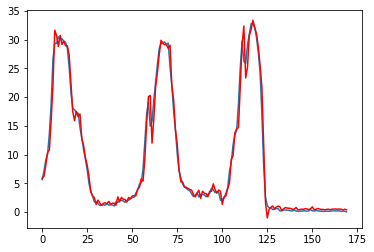

In [181]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

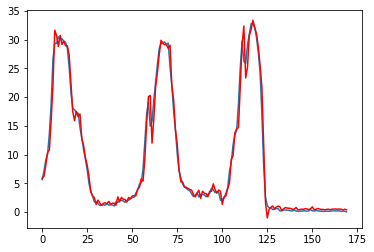

1.39463440066183

In [182]:
#RMSE
arima_window_ase(flu_data.pct_positive, train_ratio = .60, order=(2,0,0))